<a href="https://colab.research.google.com/github/vishwanath103/12-Simple-Data-Science-Apps/blob/main/Learning_and_Exploring_torch_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pathlib import Path
import requests

In [3]:
DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

In [4]:
URL = "https://github.com/pytorch/tutorials/raw/master/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
  content = requests.get(URL + FILENAME).content
  (PATH / FILENAME).open("wb").write(content)

In [6]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
  ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

In [8]:
!pip install wandb

     |████████████████████████████████| 1.7 MB 8.3 MB/s 
     |████████████████████████████████| 97 kB 6.0 MB/s 
     |████████████████████████████████| 170 kB 53.3 MB/s 
     |████████████████████████████████| 133 kB 58.6 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=e3f5d13baaf661ae182d9528aded9ccc154c3ad24508fb03f22ed0ba430942d2
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=70666a51419e7d7c338639e430e9dc8d33d0ec450b62a57c7dcb02d6b2620b6c
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


In [12]:
import numpy as np
import wandb

print(x_train.shape)
im = wandb.Image(x_train[0].reshape((28,28)))
im.image

(50000, 784)


In [14]:
import torch

(x_train,y_train,x_valid,y_valid) = map(torch.tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


## Neural Net from scratch

In [18]:
import math

weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()
biases = torch.zeros(10, requires_grad=True)

In [19]:
def log_softmax(x):
  return x-x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
  return log_softmax(xb @ weights + biases)

In [20]:
bs = 64 # batch size

xb = x_train[0:bs] # a mini batch from x
preds = model(xb)
preds[0], preds.shape

(tensor([-2.2628, -2.4717, -1.9453, -2.4616, -2.2052, -2.4420, -2.2887, -2.7974,
         -1.9550, -2.4999], grad_fn=<SelectBackward>), torch.Size([64, 10]))

In [22]:
!pip install torchviz

  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=2e85375325b709f10b3a90225adedba974a972b011735cbc66ca55e07f418bd4
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


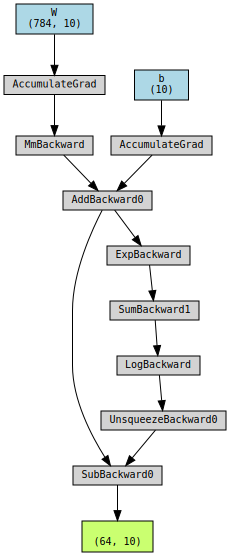

In [23]:
import torchviz

torchviz.make_dot(preds, params={"W": weights, "b": biases})